In [63]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times New Roman']})
rc('text', usetex=True)
%matplotlib inline

$\textbf{I.}$ Mediante la aplicación del método de Runge-Kutta de quinto orden (RK5) obtenga la solución de la ecuación diferencial:

$\frac{dy}{dx} + 2y = x \hspace{0.5cm}$ con $\hspace{0.5cm}y (0)=1$

Grafique la solución obtenida en el intervalo $0 \leq x \leq 5$ utilizando $h=0.01$. Para verificar que su código es correcto muestre su resultado junto con la solución exacta: $y(x)=\frac{1}{4}(2x + 5e^{-2x}-1)$

In [74]:
def f(x,y): #Ec. diferencial a resolver
    return x-2*y
def g(x): #Solución exacta
    return (1.0/4)*(2*x + 5*np.exp(-2*x) -1)

#RK5
X=[]
Y=[]
h=0.01
x=0
y=1
while x<=5:
    X.append(x)
    Y.append(y)
    k1=f(x,y)
    k2=f(x+(1.0/4)*h,y+(1.0/4)*k1*h)
    k3=f(x+(1.0/4)*h,y+(1.0/8)*k1*h+(1.0/8)*k2*h)
    k4=f(x+(1.0/2)*h,y-(1.0/2)*k2*h+k3*h)
    k5=f(x+(3.0/4)*h,y+(3.0/16)*k1*h+(9.0/16)*k4*h)
    k6=f(x+h,y-(3.0/7)*k1*h+(2.0/7)*k2*h+(12.0/7)*k3*h-(12.0/7)*k4*h+(8.0/7)*k5*h)
    y+=(1.0/90)*(7*k1+32*k3+12*k4+32*k5+7*k6)*h
    x+=h

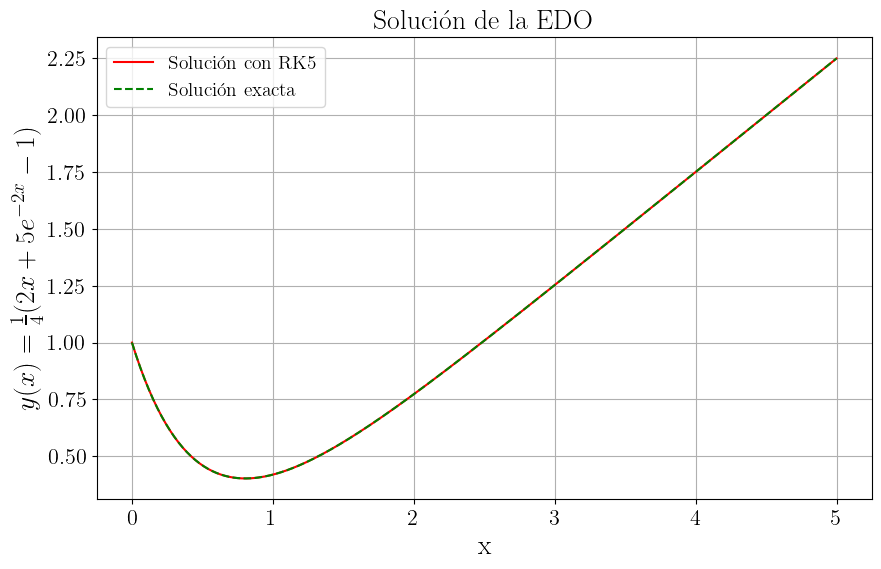

In [83]:
g=np.vectorize(g)

plt.figure(figsize=(10,6))
plt.plot(X,Y,'r-', label='Solución con RK5')
plt.plot(X,g(X), 'g--', label='Solución exacta')
plt.xlabel('x', fontsize=20)
plt.ylabel(r'$y(x) = \frac{1}{4}(2x + 5e^{-2x} -1) $', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Solución de la EDO', fontsize=20)
plt.grid()
plt.legend(fontsize=14)
plt.show()

$\textbf{II.}$ Adaptando el método RK5 del punto $\textbf{I}$ para resolver la ecuación diferencial que describe el movimiento de una masa en una barra oscilando (deducida en clase)

$\frac{d²r(t)}{dt²} = r(t)\left( \frac{\pi ²}{12} \right)² sin²(\pi t) -g \hspace{0.05cm}sin\left[\frac{\pi}{12}cos(\pi t) \right] $

Grafique la solución obtenida para $r(t)$ en el intervalo $0 \leq t \leq 5$ utilizando $h=0.001$ y las condiciones iniciales $r(0)=0.45\hspace{0.05cm}m$ y $\dot{r}(0)=0.01\hspace{0.05cm}m/s$. Incluya en esta figura la velocidad $\dot{r}(t)$.

Exprese la ecuación diferencial de segundo orden como un sistema de dos ecuaciones de primer orden.

$x=r(t)\\$
$f(t,x,y)$ $\to$ $y = \dot{r}(t)\\$
$g(t,x,y)$ $\to$ $\dot{y} = \ddot{r}(t) =x\left( \frac{\pi ²}{12} \right)² sin²(\pi t) -g \hspace{0.05cm}sin\left[\frac{\pi}{12}cos(\pi t) \right]$ 

In [68]:
def f1(t,x,y):
    return y 

def g1(t,x,y):
    g_=9.81
    return x*(np.pi**2/12)**2 *np.sin(np.pi*t)**2 - g_*np.sin((np.pi/12)*np.cos(np.pi*t))

#RK5 adaptado

T1=[]
X1=[]
Y1=[]

t1=0
x1=0.45
y1=0.01
h1=0.001

while t1<=5:
    T1.append(t1)
    X1.append(x1)
    Y1.append(y1)

    k1x=f1(t1,x1,y1)
    k1y=g1(t1,x1,y1)

    k2x=f1(t1+(1.0/4)*h1,x1+(1.0/4)*k1x*h1,y1+(1.0/4)*k1y*h1)
    k2y=g1(t1+(1.0/4)*h1,x1+(1.0/4)*k1x*h1,y1+(1.0/4)*k1y*h1)

    k3x=f1(t1+(1.0/4)*h1,x1+(1.0/8)*k1x*h1+(1.0/8)*k2x*h1,y1+(1.0/8)*k1y*h1+(1.0/8)*k2y*h1)
    k3y=g1(t1+(1.0/4)*h1,x1+(1.0/8)*k1x*h1+(1.0/8)*k2x*h1,y1+(1.0/8)*k1y*h1+(1.0/8)*k2y*h1)

    k4x=f1(t1+(1.0/2)*h1,x1-(1.0/2)*k2x*h1+k3x*h1,y1-(1.0/2)*k2y*h1+k3y*h1)
    k4y=g1(t1+(1.0/2)*h1,x1-(1.0/2)*k2x*h1+k3x*h1,y1-(1.0/2)*k2y*h1+k3y*h1)

    k5x=f1(t1+(3.0/4)*h1,x1+(3.0/16)*k1x*h1+(9.0/16)*k4x*h1,y1+(3.0/16)*k1y*h1+(9.0/16)*k4y*h1)
    k5y=g1(t1+(3.0/4)*h1,x1+(3.0/16)*k1x*h1+(9.0/16)*k4x*h1,y1+(3.0/16)*k1y*h1+(9.0/16)*k4y*h1)

    k6x=f1(t1+h1,x1-(3.0/7)*k1x*h1+(2.0/7)*k2x*h1+(12.0/7)*k3x*h1-(12.0/7)*k4x*h1+(8.0/7)*k5x*h1,
           y1-(3.0/7)*k1y*h1+(2.0/7)*k2y*h1+(12.0/7)*k3y*h1-(12.0/7)*k4y*h1+(8.0/7)*k5y*h1)
    k6y=g1(t1+h1,x1-(3.0/7)*k1x*h1+(2.0/7)*k2x*h1+(12.0/7)*k3x*h1-(12.0/7)*k4x*h1+(8.0/7)*k5x*h1,
           y1-(3.0/7)*k1y*h1+(2.0/7)*k2y*h1+(12.0/7)*k3y*h1-(12.0/7)*k4y*h1+(8.0/7)*k5y*h1)

    x1+=(1.0/90)*(7*k1x+32*k3x+12*k4x+32*k5x+7*k6x)*h1
    y1+=(1.0/90)*(7*k1y+32*k3y+12*k4y+32*k5y+7*k6y)*h1
    t1+=h1


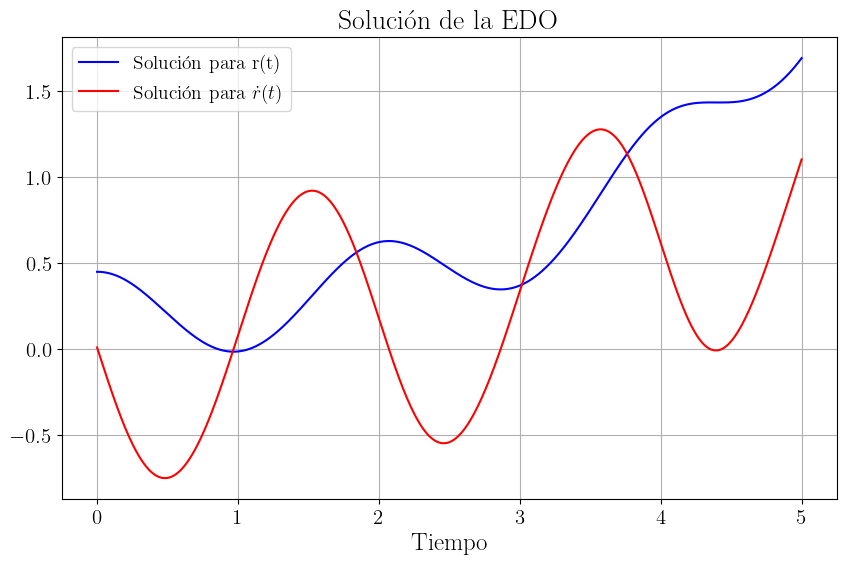

In [85]:
f1=np.vectorize(f1)

plt.figure(figsize=(10,6))
plt.plot(T1,X1,'b-', label='Solución para r(t)')
plt.plot(T1,f1(T1,X1,Y1), 'r-', label=r'Solución para $\dot{r}(t)$')
plt.xlabel('Tiempo', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Solución de la EDO', fontsize=20)
plt.grid()
plt.legend(fontsize=14)
plt.show()